In [23]:
import pandas as pd

In [24]:
df_salary = pd.read_csv('Salary.csv')

In [25]:
df_salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [26]:
#How many rows and columns does the dataset have?

In [27]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [28]:
#What is the average age of individuals, and how many years of experience do they have on average in their current jobs?

In [29]:
df_salary['Age'] = df_salary['Age'].astype(int)
average_age = df_salary['Age'].mean()
print(f"The average age is: {int(average_age)} years")

The average age is: 33 years


In [30]:
df_salary['Years of Experience'] = df_salary['Years of Experience'].astype(int)
average_experience = df_salary['Years of Experience'].mean()
print(f"The average experience is: {int(average_experience)} years")

The average experience is: 8 years


In [31]:
#How many males and females are there in the dataset, and what is the gender ratio?

In [32]:
male_count = len(df_salary[df_salary['Gender'] == 'Male'])
female_count = len(df_salary[df_salary['Gender'] == 'Female'])
print(f"The number of Males in the dataset is: {int(male_count)}",f"The number of Females in the dataset is: {int(female_count)}")

The number of Males in the dataset is: 3671 The number of Females in the dataset is: 3013


In [33]:
gender_total_count = len(df_salary)
male_ratio = male_count / gender_total_count
female_ratio = female_count / gender_total_count
print(f"Gender ratio (male/female): {male_ratio:.2f}/{female_ratio:.2f}")


Gender ratio (male/female): 0.55/0.45


In [34]:
#What are the most common education levels among the participants?

In [35]:
education_levels = df_salary['Education Level'].value_counts()
print("Most common education levels:")
print(education_levels)

Most common education levels:
Education Level
1    3021
2    1858
3    1369
0     436
Name: count, dtype: int64


In [36]:
#From how many different countries are the participants, and what are the top five countries with the highest representation?

In [37]:
country_counts = df_salary['Country'].value_counts()
num_countries = len(country_counts)
top_countries = country_counts.head()
print(f"Number of different countries: {num_countries}")
print("Top countries with the highest representation:")
print(top_countries)

Number of different countries: 5
Top countries with the highest representation:
Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64


In [83]:
#What is the average salary in the dataset, and what are the highest and lowest recorded salaries?

In [39]:
average_salary = df_salary['Salary'].mean()
highest_salary = df_salary['Salary'].max()
lowest_salary = df_salary['Salary'].min()
print(f"The average salary is: {average_salary:.2f}")
print(f"The highest recorded salary is: {highest_salary:.2f}")
print(f"The lowest recorded salary is: {lowest_salary:.2f}")

The average salary is: 115307.18
The highest recorded salary is: 250000.00
The lowest recorded salary is: 350.00


In [84]:
#Is there any evident relationship between the years of experience and the salary of the participants?

In [41]:
import matplotlib.pyplot as plt

In [42]:
correlation_coefficient = df_salary['Years of Experience'].corr(df_salary['Salary'])
print(f"Correlation coefficient between Years of Experience and Salary: {correlation_coefficient:.2f}")

Correlation coefficient between Years of Experience and Salary: 0.81


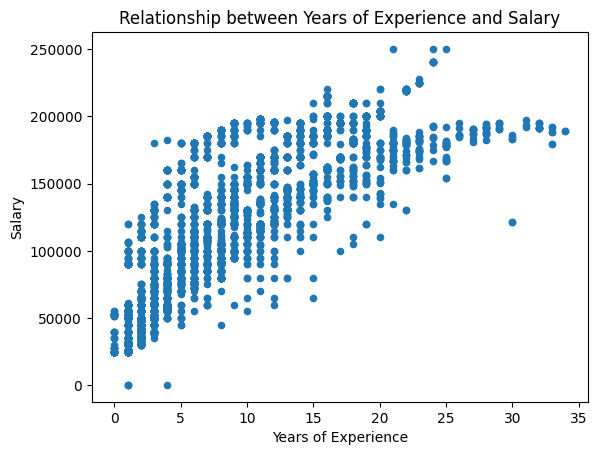

In [43]:
df_salary.plot.scatter(x='Years of Experience', y='Salary', title='Relationship between Years of Experience and Salary')
plt.show()

In [85]:
#Which races or ethnicities are represented in the dataset, and how are they distributed?

In [45]:
race_distribution = df_salary['Race'].value_counts()
print("Races or ethnicities represented and their distribution:")
print(race_distribution)

Races or ethnicities represented and their distribution:
Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [86]:
#How does the salary vary among different countries and genders of the participants?

In [47]:
salary_by_country_gender = df_salary.groupby(['Country', 'Gender'])['Salary'].mean().round(0).astype(int)
print("Average salary by country and gender:")
print(salary_by_country_gender)

Average salary by country and gender:
Country    Gender
Australia  Female    107914
           Male      120897
Canada     Female    106885
           Male      123982
China      Female    111291
           Male      120226
UK         Female    108457
           Male      122206
USA        Female    104993
           Male      119683
Name: Salary, dtype: int32


In [87]:
#How are the ages distributed in different groups, and is there any correlation between age and education level?

In [49]:
age_by_education = df_salary.groupby('Education Level')['Age'].describe()
correlation_age_education = df_salary['Age'].corr(df_salary['Education Level'])
print("Age distribution in different education levels:")
print(age_by_education)
print(f"Correlation coefficient between age and education is: {correlation_age_education:.2f}")

Age distribution in different education levels:
                  count       mean       std   min   25%   50%   75%   max
Education Level                                                           
0                 436.0  26.493119  3.459779  21.0  24.0  26.0  29.0  49.0
1                3021.0  30.260179  5.139817  22.0  27.0  29.0  32.0  55.0
2                1858.0  35.169537  6.432266  24.0  30.0  34.0  39.0  58.0
3                1369.0  41.154858  7.898810  23.0  34.0  42.0  47.0  62.0
Correlation coefficient between age and education is: 0.60


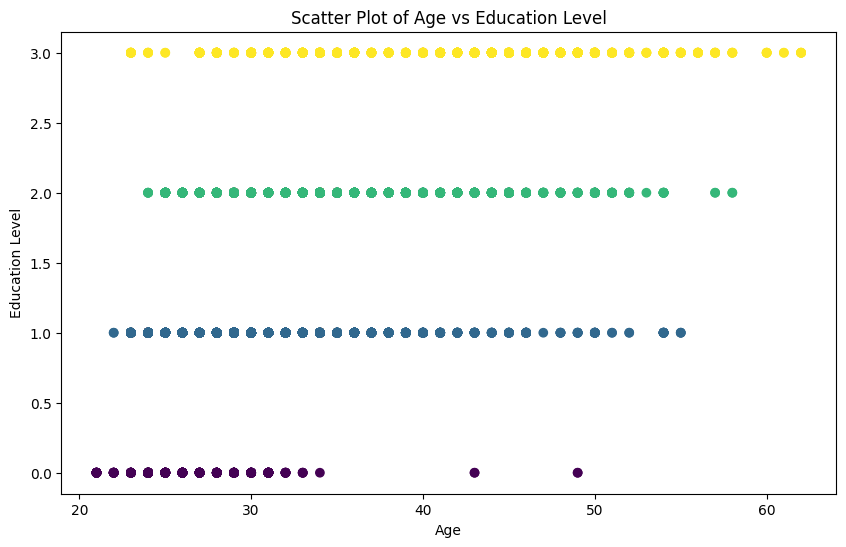

In [50]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_salary['Age'], df_salary['Education Level'], c=df_salary['Education Level'], cmap='viridis')
plt.title('Scatter Plot of Age vs Education Level')
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.show()

In [88]:
#How do salaries compare among different races or ethnicities?

In [52]:
salary_by_race = df_salary.groupby('Race')['Salary'].mean().sort_values(ascending=False).round(2).astype(float)
print("Average Salary by Race or Ethnicity:")
print(salary_by_race)

Average Salary by Race or Ethnicity:
Race
Black               118415.63
Korean              117099.76
White               117042.94
Mixed               116330.86
Asian               115246.05
Australian          114236.68
Welsh               112560.65
African American    112355.28
Chinese             111248.32
Hispanic            110410.14
Name: Salary, dtype: float64


In [89]:
#Are there gender-based differences in education levels?

In [54]:
education_by_gender = df_salary.groupby('Gender')['Education Level'].value_counts()
print("Education Levels by Gender:")
print(education_by_gender)

Education Levels by Gender:
Gender  Education Level
Female  1                  1198
        2                  1068
        3                   496
        0                   251
Male    1                  1823
        3                   873
        2                   790
        0                   185
Name: count, dtype: int64


In [90]:
#Is there any correlation between age and salary?

In [57]:
correlation_age_salary = df_salary['Age'].corr(df_salary['Salary'])
print("Correlation between Age and Salary:", correlation_age_salary)

Correlation between Age and Salary: 0.7283429330159281


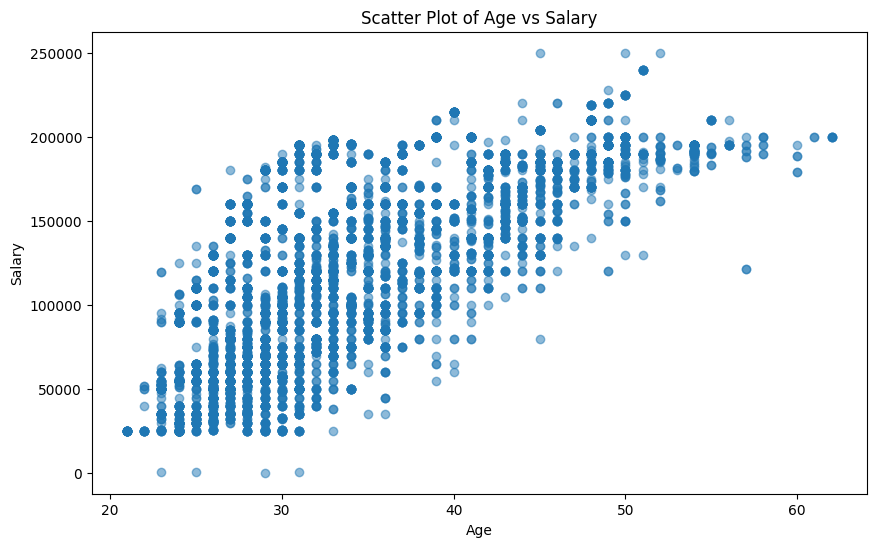

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df_salary['Age'], df_salary['Salary'], alpha=0.5)
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [91]:
#Which job titles are most common among the participants?

In [63]:
job_title_counts = df_salary['Job Title'].value_counts()
print("Most Common Job Titles:")
print(job_title_counts.head(10))

Most Common Job Titles:
Job Title
Software Engineer            809
Data Scientist               515
Data Analyst                 391
Software Engineer Manager    376
Product Manager              323
Project Engineer             317
Marketing Manager            315
Full Stack Engineer          304
Back end Developer           242
Front end Developer          239
Name: count, dtype: int64


In [64]:
#How are ages distributed among different genders?

In [67]:
age_stats_by_gender = df_salary.groupby('Gender')['Age'].describe()
print("Age Distribution by Gender:")
print(age_stats_by_gender)

Age Distribution by Gender:
         count       mean       std   min   25%   50%   75%   max
Gender                                                           
Female  3013.0  32.626286  6.976178  21.0  28.0  31.0  36.0  60.0
Male    3671.0  34.418415  7.979936  22.0  28.0  32.0  40.0  62.0


In [92]:
#What is the average seniority level among the participants?

In [70]:
average_seniority = df_salary['Senior'].mean()
print("Average Seniority Level among Participants:", average_seniority)

Average Seniority Level among Participants: 0.14347695990424894


In [71]:
#How is the distribution of seniority levels in the dataset?"

In [73]:
seniority_distribution = df_salary['Senior'].value_counts()
print("Distribution of Seniority Levels:")
print(seniority_distribution)

Distribution of Seniority Levels:
Senior
0    5725
1     959
Name: count, dtype: int64


In [74]:
#What is the age statistics by seniority level?

In [75]:
seniority_by_age = df_salary.groupby('Senior')['Age'].describe()
print("Seniority by age is:")
print(seniority_by_age)

Seniority by age is:
         count       mean       std   min   25%   50%   75%   max
Senior                                                           
0       5725.0  32.572052  7.235501  21.0  27.0  31.0  36.0  62.0
1        959.0  39.810219  6.692115  23.0  35.0  40.0  45.0  58.0


In [76]:
#How is gender distributed across seniority levels?

In [82]:
senior_participants = df_salary[df_salary['Senior'] == 1]
senior_gender_counts = senior_participants['Gender'].value_counts()
print("Seniority by gender is:")
print(senior_gender_counts)

Seniority by gender is:
Gender
Male      572
Female    387
Name: count, dtype: int64
